## IMPORT STANDARD PACKAGES

In [25]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt


## EXPLORATORY DATA ANALYSIS

In [26]:
crop = pd.read_csv('Crop_recommendation.csv')
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [27]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [28]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [29]:
crop['label'].value_counts()

jute           100
apple          100
grapes         100
mungbean       100
orange         100
lentil         100
pomegranate    100
coconut        100
watermelon     100
muskmelon      100
pigeonpeas     100
rice           100
banana         100
cotton         100
blackgram      100
chickpea       100
mango          100
mothbeans      100
papaya         100
maize          100
kidneybeans    100
coffee         100
Name: label, dtype: int64

In [6]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for",conditions,"is {0: .2f}".format(crop[conditions].mean()))
    print("----------------------------------------------------------------")
    print("Rice : {0: .2f}".format(crop[(crop['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0: .2f}".format(crop[(crop['label'] == 'blackgram')][conditions].mean()))
    print("Banana : {0: .2f}".format(crop[(crop['label'] == 'banana')][conditions].mean()))
    print("Jute : {0: .2f}".format(crop[(crop['label'] == 'jute')][conditions].mean()))
    print("Coconut : {0: .2f}".format(crop[(crop['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0: .2f}".format(crop[(crop['label'] == 'apple')][conditions].mean()))
    print("Papaya : {0: .2f}".format(crop[(crop['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0: .2f}".format(crop[(crop['label'] == 'muskmelon')][conditions].mean()))
    print("Grapes : {0: .2f}".format(crop[(crop['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0: .2f}".format(crop[(crop['label'] == 'watermelon')][conditions].mean()))
    print("Kedney Beans : {0: .2f}".format(crop[(crop['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0: .2f}".format(crop[(crop['label'] == 'mungbean')][conditions].mean()))
    print("Oranges : {0: .2f}".format(crop[(crop['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0: .2f}".format(crop[(crop['label'] == 'chickpea')][conditions].mean()))
    print("Lentils : {0: .2f}".format(crop[(crop['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0: .2f}".format(crop[(crop['label'] == 'cotton')][conditions].mean()))
    print("Maize : {0: .2f}".format(crop[(crop['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0: .2f}".format(crop[(crop['label'] == 'mothbeans')][conditions].mean()))
    print("Pigeon peas : {0: .2f}".format(crop[(crop['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0: .2f}".format(crop[(crop['label'] == 'mango')][conditions].mean()))
    print("Pomegrante : {0: .2f}".format(crop[(crop['label'] == 'pomegrante')][conditions].mean()))
    print("Coffee : {0: .2f}".format(crop[(crop['label'] == 'coffee')][conditions].mean()))
    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [7]:
@interact
def summary(Crop_types = list(crop['label'].value_counts().index)):
    x = crop[crop['label'] == Crop_types]
    print("-------------------------------------------------")
    print("Statistics for Nitrogen :")
    print("Minimum Nitrogen Required :", x['N'].min())
    print("Average Nitrogen Required :", x['N'].mean())
    print("Maximum Nitrogen Required :", x['N'].max())
    print("-------------------------------------------------")
    print("Statistics for Phosphorous :")
    print("Minimum Phosphorous Required :", x['P'].min())
    print("Average Phosphorous Required :", x['P'].mean())
    print("Maximum Phosphorous Required :", x['P'].max())
    print("-------------------------------------------------")
    print("Statistics for Potassium :")
    print("Minimum Potassium Required :", x['K'].min())
    print("Average Potassium Required :", x['K'].mean())
    print("Maximum Potassium Required :", x['K'].max())
    print("-------------------------------------------------")
    print("Statistics for Temperature :")
    print("Minimum Temperature Required : {0: .2f}".format(x['temperature'].min()))
    print("Average Temperature Required : {0: .2f}".format(x['temperature'].mean()))
    print("Maximum Temperature Required : {0: .2f}".format(x['temperature'].max()))
    print("-------------------------------------------------")
    print("Statistics for Humidity :")
    print("Minimum Humidity Required : {0: .2f}".format(x['humidity'].min()))
    print("Average Humidity Required : {0: .2f}".format(x['humidity'].mean()))
    print("Maximum Humidity Required : {0: .2f}".format(x['humidity'].max()))
    print("-------------------------------------------------")
    print("Statistics for PH :")
    print("Minimum PH Required : {0: .2f}".format(x['ph'].min()))
    print("Average PH Required : {0: .2f}".format(x['ph'].mean()))
    print("Maximum PH Required : {0: .2f}".format(x['ph'].max()))
    print("-------------------------------------------------")
    print("Statistics for Rainfall :")
    print("Minimum Rainfall Required : {0: .2f}".format(x['rainfall'].min()))
    print("Average Rainfall Required : {0: .2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall Required : {0: .2f}".format(x['rainfall'].max()))
    print("-------------------------------------------------")
    

interactive(children=(Dropdown(description='Crop_types', options=('jute', 'apple', 'grapes', 'mungbean', 'oran…

## FEATURE SELECTION

In [8]:
features = crop[['N', 'P','K','temperature','humidity','ph','rainfall']]
target = crop['label']
labels = crop['label']
acc = []
model = []

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

## DECISION TREE ALGORITHM

In [9]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
             precision    recall  f1-score   support

      apple       1.00      1.00      1.00        13
     banana       1.00      1.00      1.00        17
  blackgram       0.59      1.00      0.74        16
   chickpea       1.00      1.00      1.00        21
    coconut       0.91      1.00      0.95        21
     coffee       1.00      1.00      1.00        22
     cotton       1.00      1.00      1.00        20
     grapes       1.00      1.00      1.00        18
       jute       0.74      0.93      0.83        28
kidneybeans       0.00      0.00      0.00        14
     lentil       0.68      1.00      0.81        23
      maize       1.00      1.00      1.00        21
      mango       1.00      1.00      1.00        26
  mothbeans       0.00      0.00      0.00        19
   mungbean       1.00      1.00      1.00        24
  muskmelon       1.00      1.00      1.00        23
     orange       1.00      1.00      1.00        29
     papay

In [10]:
score = cross_val_score(DecisionTree, features, target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]


In [11]:
#Print Train Accuracy
dt_train_accuracy = DecisionTree.score(Xtrain,Ytrain)
print("Training accuracy = ",DecisionTree.score(Xtrain,Ytrain))
#Print Test Accuracy
dt_test_accuracy = DecisionTree.score(Xtest,Ytest)
print("Testing accuracy = ",DecisionTree.score(Xtest,Ytest))

Training accuracy =  0.8818181818181818
Testing accuracy =  0.9


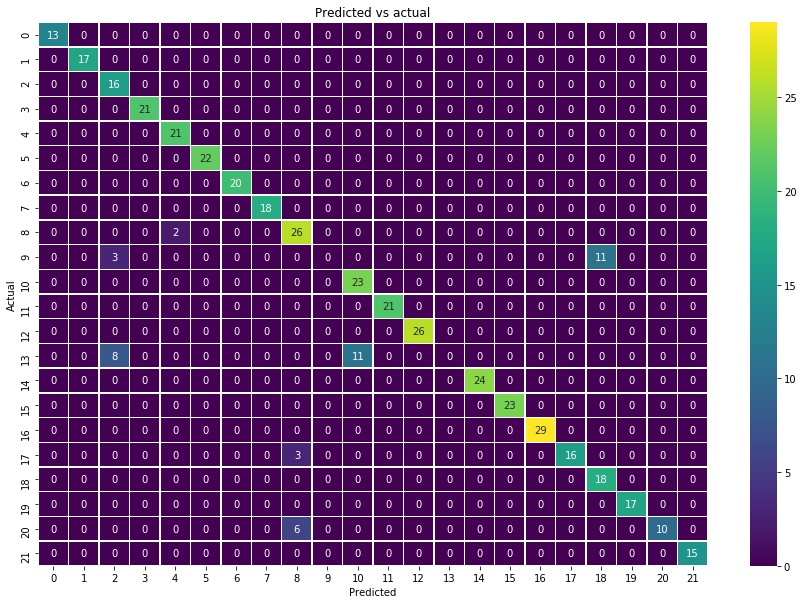

In [12]:
Ypred = DecisionTree.predict(Xtest)
Ytrue = Ytest

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(Ytrue,Ypred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()


## NAIVE BAYES CALSSIFICATION ALGORITHM

In [13]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
#x_pre= metrics.precision_score(Ytest, predicted_values)
#x_rec= metrics.recall_score(Ytest, predicted_values)
#x_Fscore= metrics.f1_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Naive Bayes Accuracy is:  99.0909090909091
             precision    recall  f1-score   support

      apple       1.00      1.00      1.00        13
     banana       1.00      1.00      1.00        17
  blackgram       1.00      1.00      1.00        16
   chickpea       1.00      1.00      1.00        21
    coconut       1.00      1.00      1.00        21
     coffee       1.00      1.00      1.00        22
     cotton       1.00      1.00      1.00        20
     grapes       1.00      1.00      1.00        18
       jute       0.88      1.00      0.93        28
kidneybeans       1.00      1.00      1.00        14
     lentil       1.00      1.00      1.00        23
      maize       1.00      1.00      1.00        21
      mango       1.00      1.00      1.00        26
  mothbeans       1.00      1.00      1.00        19
   mungbean       1.00      1.00      1.00        24
  muskmelon       1.00      1.00      1.00        23
     orange       1.00      1.00      1.00        29
  

In [14]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [15]:
#Print Train Accuracy
NB_train_accuracy = NaiveBayes.score(Xtrain,Ytrain)
print("Training accuracy = ",NaiveBayes.score(Xtrain,Ytrain))
#Print Test Accuracy
NB_test_accuracy = NaiveBayes.score(Xtest,Ytest)
print("Testing accuracy = ",NaiveBayes.score(Xtest,Ytest))

Training accuracy =  0.9960227272727272
Testing accuracy =  0.990909090909091


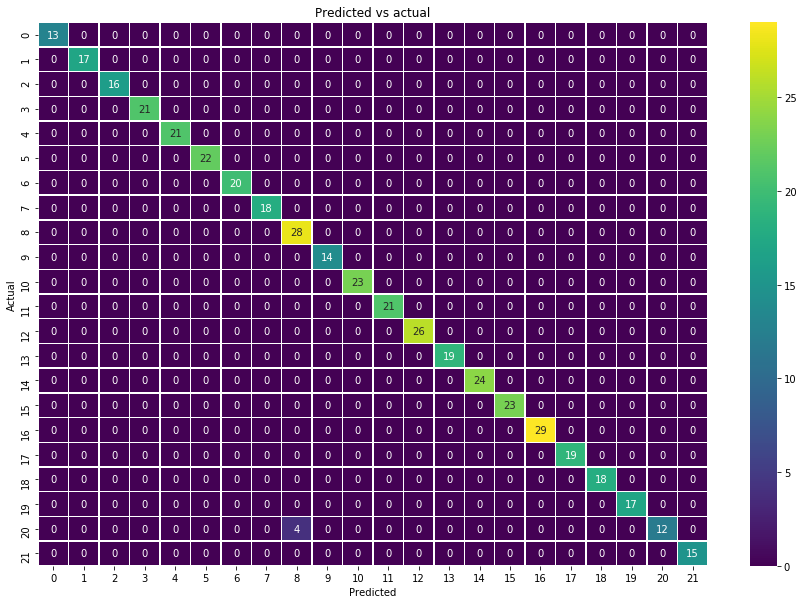

In [16]:
Ypred = NaiveBayes.predict(Xtest)
Ytrue = Ytest

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(Ytrue,Ypred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

## LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression
LogisticReg=LogisticRegression()
LogisticReg.fit(Xtrain,Ytrain)

predicted_values = LogisticReg.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  94.31818181818183
             precision    recall  f1-score   support

      apple       1.00      1.00      1.00        13
     banana       1.00      1.00      1.00        17
  blackgram       0.79      0.94      0.86        16
   chickpea       1.00      1.00      1.00        21
    coconut       1.00      1.00      1.00        21
     coffee       1.00      1.00      1.00        22
     cotton       0.87      1.00      0.93        20
     grapes       1.00      1.00      1.00        18
       jute       0.88      0.79      0.83        28
kidneybeans       1.00      1.00      1.00        14
     lentil       0.88      0.96      0.92        23
      maize       1.00      0.86      0.92        21
      mango       1.00      1.00      1.00        26
  mothbeans       1.00      0.84      0.91        19
   mungbean       1.00      0.92      0.96        24
  muskmelon       1.00      1.00      1.00        23
     orange       1.00      1.00      1.00  

In [18]:
score = cross_val_score(LogisticReg, features, target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.96818182 0.93636364 0.95681818 0.95681818 0.94772727]


In [19]:
#Print Train Accuracy
LR_train_accuracy = LogisticReg.score(Xtrain,Ytrain)
print("Training accuracy = ",LogisticReg.score(Xtrain,Ytrain))
#Print Test Accuracy
LR_test_accuracy = LogisticReg.score(Xtest,Ytest)
print("Testing accuracy = ",LogisticReg.score(Xtest,Ytest))

Training accuracy =  0.95625
Testing accuracy =  0.9431818181818182


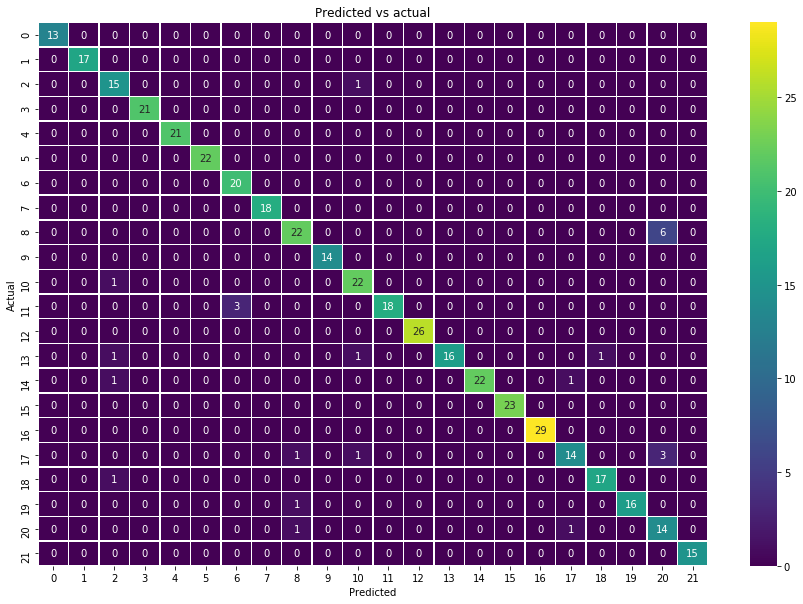

In [20]:
Ypred = LogisticReg.predict(Xtest)
Ytrue = Ytest

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(Ytrue,Ypred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [21]:
crop_pred_DT=DecisionTree.predict(np.array([[112,46,38,29,56,7,167]]))
print(crop_pred_DT)
crop_pred_NB=NaiveBayes.predict(np.array([[112,46,38,29,56,7,167]]))
print(crop_pred_NB)
crop_pred_LR=LogisticReg.predict(np.array([[112,46,38,29,56,7,167]]))
print(crop_pred_LR)

['jute']
['coffee']
['coffee']


In [30]:
crop_pred_DT=DecisionTree.predict(np.array([[95,48,44,25,79,7.3,220]]))
print(crop_pred_DT)
crop_pred_NB=NaiveBayes.predict(np.array([[95,48,44,25,79,7.3,220]]))
print(crop_pred_NB)
crop_pred_LR=LogisticReg.predict(np.array([[95,48,44,25,79,7.3,220]]))
print(crop_pred_LR)

['rice']
['rice']
['rice']


## ACCURACY COMPARISON

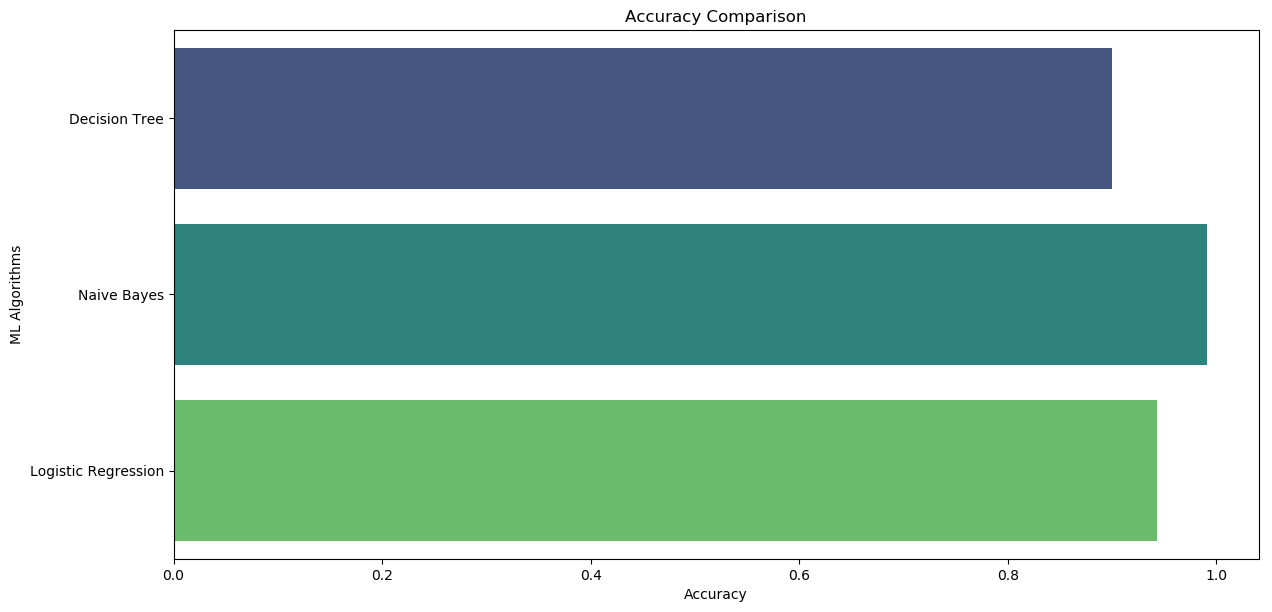

In [23]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

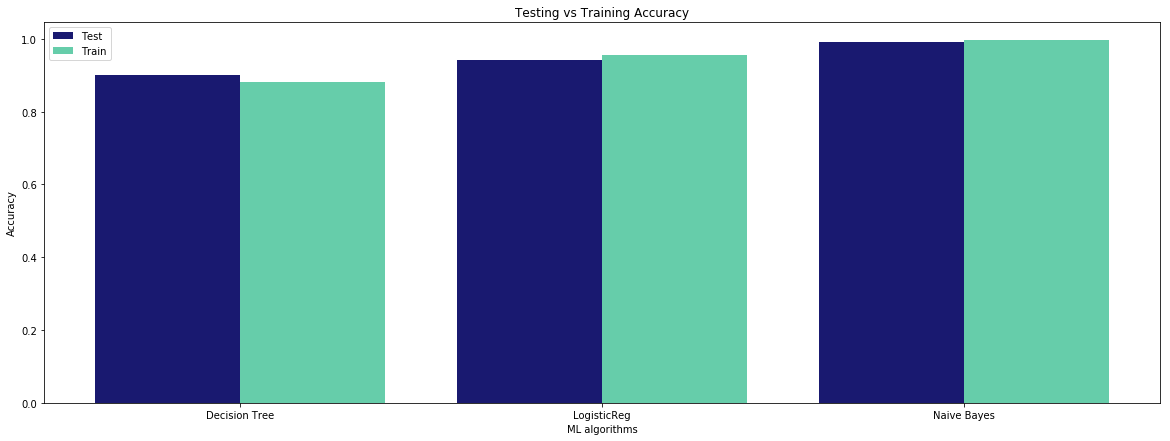

In [24]:
label = ['Decision Tree','LogisticReg','Naive Bayes']
Test = [ dt_test_accuracy,LR_test_accuracy,
        NB_test_accuracy]
Train = [dt_train_accuracy, LR_train_accuracy,
         NB_train_accuracy]

f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()